### importing relevant packages

In [1]:
# example of fitting a gaussian mixture model with expectation maximization
from numpy import hstack
from numpy.random import normal
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

### generating data from 2 different gaussian distributions

In [127]:
# generate a sample
X1 = normal(loc=20, scale=5, size=4000)
X2 = normal(loc=40, scale=2, size=6000)
X = hstack((X1, X2))
# reshape into a table with one column
X = X.reshape((len(X), 1))

In [128]:
X.shape

(10000, 1)

### Expectation maximization

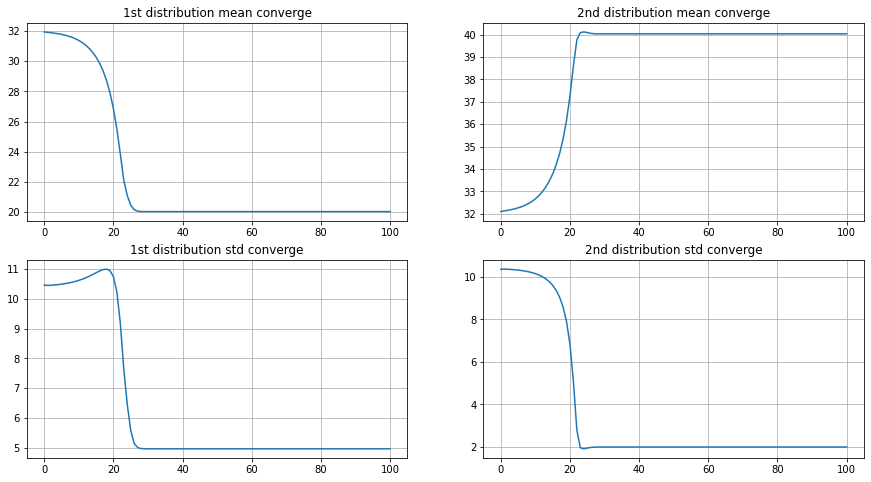

In [129]:
# randomly initialize the clusters to which each point belongs
cluster=np.random.randint(2,size=X.shape)
x1=X[np.where(cluster==0)]
x2=X[np.where(cluster==1)]

# calculate mean and std for each cluster(distribution)
m1= x1.mean()
m2=x2.mean()
sigma1= x1.std()
sigma2= x2.std()


# assuming we have no info about prior (setting them uniform). Note: that's the main difference between MLE and MAP
# try playing around with priors and notice learning curves
prior1=0.5
prior2=0.5

# storing distribution parameters
mean_list1=[m1]
mean_list2=[m2]
std_list1=[sigma1]
std_list2=[sigma2]


for i in range(100):
    
    
#   calculate likelihoods for each point to belong to one distribution
    likelihood1= norm.pdf(X,m1,sigma1)
    likelihood2=norm.pdf(X,m2,sigma2)
    
#   calculate posteriors (note that both denominator and uniform priors are same for both distributions, we can ignore them and just focus on likelihood ,however, we incorporate them for explanation)
    posterior1= (likelihood1 * prior1) / ((likelihood1 * prior1)+(likelihood2 * prior2))
    posterior2= (likelihood2 * prior2) / ((likelihood2 * prior2)+(likelihood1 * prior1))
    
#   posterior2 =1-posterior1
    
    
#   calculate new mean and std for each cluster(distribution)
    m1= ((posterior1.T@X)/sum(posterior1))[0][0]
    m2= ((posterior2.T@X)/sum(posterior2))[0][0]
    sigma1= np.sqrt((posterior1.T@((X-m1)**2))/sum(posterior1))[0][0]
    sigma2= np.sqrt((posterior2.T@((X-m2)**2))/sum(posterior2))[0][0]
    
#   storing estimated parameters
    mean_list1.append(m1)
    mean_list2.append(m2)
    std_list1.append(sigma1)
    std_list2.append(sigma2)
    
    
#    assign new clusters 
    cluster=np.argmax(np.hstack((posterior1,posterior2)),axis=1)
    x1= X[np.where(cluster==0)]
    x2=X[np.where(cluster==1)]
#     print(x1.shape,x2.shape)
    
    
# plotting learning curves
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(15,8))
ax1,ax2,ax3,ax4=ax[0,0],ax[0,1],ax[1,0],ax[1,1]
ax1.plot(mean_list1)
ax1.grid()
ax1.set_title('1st distribution mean converge')
ax2.plot(mean_list2)
ax2.grid()
ax2.set_title('2nd distribution mean converge')
ax3.plot(std_list1)
ax3.grid()
ax3.set_title('1st distribution std converge')
ax4.plot(std_list2)
ax4.grid()
ax4.set_title('2nd distribution std converge')
plt.show()

#### play around with priors, try to put wrong priors (very different from reality of our data samples 6:4) and see if the model converges
#### The key point is that if we have info about prior, we can add it to our calculation to fix the bias in data especially if we don't have 
#### enough data  (maximum a posteriori), otherwise (maximum likelihood estimation) will be a good solution assuming uniform priors

### prediction function (note that our prediction is the argmax of likelihood)

In [130]:
def predict(x):
    
    likelihood1= np.array([norm.pdf(x,m1,sigma1)]).reshape(1,1)
    likelihood2=np.array([norm.pdf(x,m2,sigma2)]).reshape(1,1)
    cluster=np.argmax(np.hstack((likelihood1,likelihood2)),axis=1)
    return cluster[0]


In [131]:
predict(31.5)

0

In [133]:
predict(38)

1

### Congratulations! great work